# Breast Cancer Diagnosis

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt


import graphviz
import itertools


from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

import os
for dirname, _, filenames in os.walk('/Users/sulekaya/Desktop/NOTEBOOK/Breast-cancer/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Users/sulekaya/Desktop/NOTEBOOK/Breast-cancer/dataset/.DS_Store
/Users/sulekaya/Desktop/NOTEBOOK/Breast-cancer/dataset/data.csv


In [6]:
df = pd.read_csv('/Users/sulekaya/Desktop/NOTEBOOK/Breast-cancer/dataset/data.csv')

In [7]:
df.shape

(569, 33)

In [8]:
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [9]:
df.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

In [10]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

İki gereksiz özelliğimiz var. Bu 'id' ve 'named 32' sütunlarını kaldırmamız gerekiyor. İki adet etiketimiz var. 
M:Kötü huylu B:İyi huylu

In [11]:
df = df.drop(["Unnamed: 32","id"],axis = 1)
X = df.drop("diagnosis",axis = 1)
Y = df['diagnosis']

X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Görselleştirme

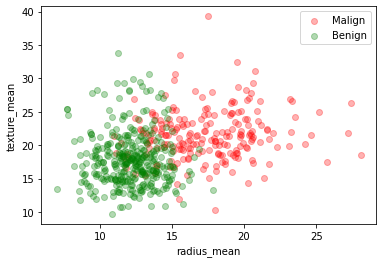

In [12]:
M = df[df.diagnosis == "M"]
B = df[df.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Malign",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="Benign",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [13]:
# Verimizi optimize edelim
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)

Nitelikler arasındaki bağıntıya bakalım

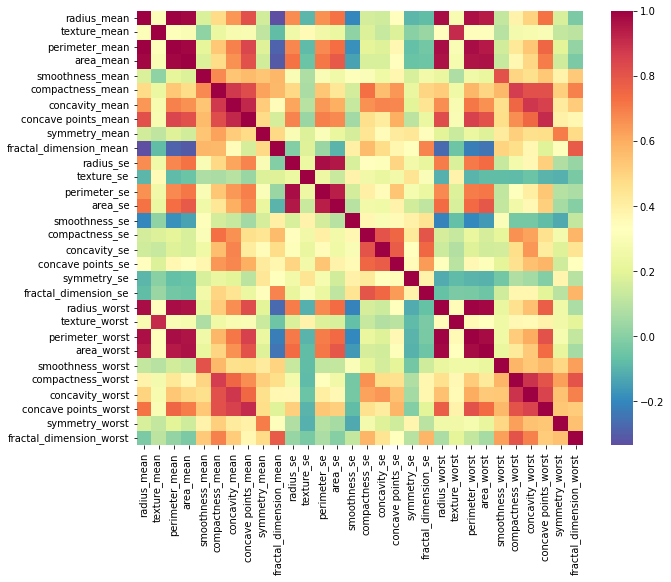

In [14]:
fig =  plt.subplots(1, 1, figsize=(10,8))
grp = sns.heatmap(x_train.corr(),cmap="Spectral_r",annot = False)

# Model Oluşturmak

In [15]:
model = tree.DecisionTreeClassifier(max_depth= 3 , min_samples_leaf=12)

model.fit(x_train,y_train)

ACC = model.score(x_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = model.score(x_test,y_test)    
print("Test dataset Accuracy = %"+ str(ACC*100))

y_pred = model.predict(x_test)

ACC = metrics.accuracy_score(y_test,y_pred)    
print("Accuracy = %"+ str(ACC*100))

Train dataset Accuracy = %95.82417582417582
Test dataset Accuracy = %94.73684210526315
Accuracy = %94.73684210526315


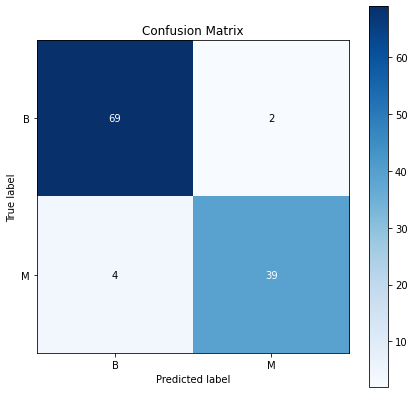

In [16]:
# Confusion Matrix
import scikitplot.metrics as splt

splt.plot_confusion_matrix(y_test,y_pred,figsize=(7,7))
plt.show()

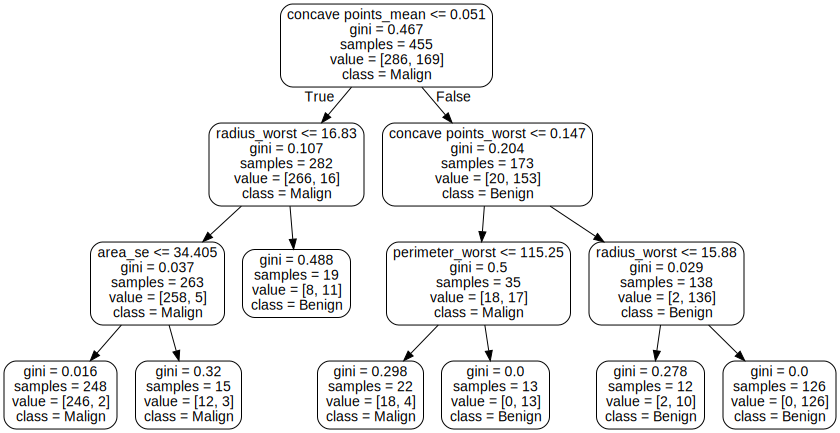

In [17]:
attributes_name = X.columns.values

def Decision_Tree_draw (mdl,names):
    ds = tree.export_graphviz(mdl,out_file = None,
                             feature_names = names,
                             class_names = ['Malign' ,'Benign'],
                             filled = False, rounded = True,
                             special_characters =False)
    
    grp = graphviz.Source(ds)
    return grp

Decision_Tree_draw(model,attributes_name)

In [19]:
# Doğruluk oranını arttırmak için yüksek bağıntıya sahip özellikleri çıkaralım.
X = X.drop(['smoothness_worst','perimeter_worst','radius_worst'],axis =1)

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 42)

model = tree.DecisionTreeClassifier(max_depth= 3 , min_samples_leaf=12)

model.fit(x_train,y_train)

ACC = model.score(x_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = model.score(x_test,y_test)    
print("Test dataset Accuracy = %"+ str(ACC*100))

Train dataset Accuracy = %95.8984375
Test dataset Accuracy = %96.49122807017544


Güçlü bir şekilde bağıntılı özellikler, yüksek varyans ve daha az model yorumlanabilirliği nedeniyle test datasetinde zayıf genelleme performansına sebep olur.


Başka bir yöntem kullanmak istiyorsak diğer sınıflandırma algoritmalarını kullanabiliriz.

In [20]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(x_train,y_train)

ACC = model.score(x_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = model.score(x_test,y_test)    
print("Test dataset Accuracy = %"+ str(ACC*100))

y_pred = model.predict(x_test)

ACC = metrics.accuracy_score(y_test,y_pred)    
print("Accuracy = %"+ str(ACC*100))

Train dataset Accuracy = %100.0
Test dataset Accuracy = %96.49122807017544
Accuracy = %96.49122807017544


In [21]:
# K-NN
from sklearn.neighbors import KNeighborsClassifier

model =KNeighborsClassifier(3)

model.fit(x_train,y_train)

ACC = model.score(x_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = model.score(x_test,y_test)    
print("Test dataset Accuracy = %"+ str(ACC*100))

y_pred = model.predict(x_test)

ACC = metrics.accuracy_score(y_test,y_pred)    
print("Accuracy = %"+ str(ACC*100))

Train dataset Accuracy = %94.921875
Test dataset Accuracy = %96.49122807017544
Accuracy = %96.49122807017544


In [22]:
# support vector machine
from sklearn.svm import SVC

svm = SVC(random_state=1)

svm.fit(x_train,y_train)

ACC = svm.score(x_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = svm.score(x_test,y_test)    
print("Test dataset Accuracy = % "+ str(ACC*100))

Train dataset Accuracy = %91.40625
Test dataset Accuracy = % 98.24561403508771


In [23]:
from sklearn.ensemble import BaggingClassifier

clf = BaggingClassifier(base_estimator=SVC(),
                       n_estimators=10, random_state=0)

clf.fit(x_train,y_train)

ACC = clf.score(x_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = clf.score(x_test,y_test)    
print("Test dataset Accuracy = % "+ str(ACC*100))

Train dataset Accuracy = %91.015625
Test dataset Accuracy = % 98.24561403508771


In [24]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)

clf.fit(x_train,y_train)

ACC = clf.score(x_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = clf.score(x_test,y_test)    
print("Test dataset Accuracy = % "+ str(ACC*100))

Train dataset Accuracy = %100.0
Test dataset Accuracy = % 96.49122807017544


In [25]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train,y_train)

ACC = nb.score(x_train,y_train)    
print("Train dataset Accuracy = %"+ str(ACC*100))

ACC = nb.score(x_test,y_test)    
print("Test dataset Accuracy = % "+ str(ACC*100))

Train dataset Accuracy = %88.671875
Test dataset Accuracy = % 98.24561403508771
